In [928]:
import pandas as pd
import numpy as np

from pandas import read_csv
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import rand_score
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from pandas import read_csv
data= read_csv("arrhythmia.data",names=("Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","QRST","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","Class")) 


data.isna().sum()




Age        0
Sex        0
Height     0
Weight     0
QRS_Dur    0
          ..
V6276      0
V6277      0
V6278      0
V6279      0
Class      0
Length: 280, dtype: int64

In [929]:
data = data.replace('?',np.nan)
data

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,Class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [930]:
df=data.copy()

for i in df.columns:
    
    df[i]=pd.to_numeric(df[i],errors='coerce').astype('float64')
for i in df.columns:
    df[i].fillna(df[i].mean(), inplace = True )
df= df.sample(frac=1.0, random_state=1).reset_index(drop=True)   
df

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,Class
0,62.0,0.0,176.0,73.0,146.0,138.0,438.0,283.0,87.0,16.0,...,0.0,10.3,0.0,0.0,0.0,0.1,-1.6,67.9,45.2,9.0
1,47.0,0.0,169.0,80.0,89.0,142.0,369.0,155.0,91.0,5.0,...,-0.5,9.4,0.0,0.0,0.0,0.7,1.4,22.0,32.9,1.0
2,44.0,1.0,155.0,65.0,80.0,117.0,363.0,142.0,72.0,56.0,...,0.0,6.2,0.0,0.0,0.0,0.5,1.1,16.1,23.8,1.0
3,46.0,0.0,168.0,60.0,100.0,185.0,413.0,147.0,93.0,-12.0,...,-0.5,11.1,-1.8,0.0,0.0,0.5,1.7,22.5,32.7,16.0
4,42.0,1.0,157.0,65.0,86.0,109.0,374.0,167.0,61.0,66.0,...,-0.4,17.3,0.0,0.0,0.0,0.5,2.5,41.2,64.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,68.0,0.0,164.0,53.0,79.0,170.0,364.0,172.0,106.0,47.0,...,0.0,8.2,-0.8,0.0,0.0,0.7,2.7,18.8,41.4,1.0
448,31.0,1.0,161.0,73.0,93.0,173.0,361.0,164.0,108.0,63.0,...,-0.7,8.5,0.0,0.0,0.0,0.7,1.5,31.5,43.5,1.0
449,45.0,1.0,158.0,65.0,82.0,122.0,336.0,174.0,63.0,38.0,...,-0.5,7.8,-0.7,0.0,0.0,-0.1,2.5,17.6,40.6,1.0
450,45.0,0.0,173.0,70.0,103.0,155.0,350.0,249.0,75.0,1.0,...,0.0,10.6,-2.6,0.0,0.0,0.9,-1.4,26.1,8.5,2.0


In [931]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaler=scaler.fit_transform(df.drop("Class", axis=1))
dfx = pd.DataFrame(x_scaler)
dfx

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,0.944089,-1.107520,0.264265,0.291426,3.719176,-0.382935,2.122797,3.176155,-0.116459,-0.389523,...,-2.484010,0.508843,0.360906,0.728573,-0.079546,0.0,-1.194952,-1.981325,3.601007,0.851317
1,0.032147,-1.107520,0.075734,0.713814,0.005190,-0.293634,0.053737,-0.419994,0.038591,-0.631914,...,0.004037,-0.403120,0.101467,0.728573,-0.079546,0.0,0.533427,0.124716,0.198228,0.185497
2,-0.150242,0.902918,-0.301328,-0.191303,-0.581229,-0.851761,-0.126182,-0.785228,-0.697898,0.491900,...,0.169906,0.508843,-0.820984,0.728573,-0.079546,0.0,-0.042700,-0.085888,-0.239166,-0.307102
3,-0.028650,-1.107520,0.048801,-0.493009,0.721924,0.666345,1.373138,-0.644753,0.116116,-1.006519,...,-0.161833,-0.403120,0.591519,-0.171331,-0.079546,0.0,-0.042700,0.335320,0.235295,0.174671
4,-0.271834,0.902918,-0.247462,-0.191303,-0.190283,-1.030362,0.203669,-0.082855,-1.124287,0.712256,...,-1.820531,-0.220727,2.378768,0.728573,-0.079546,0.0,-0.042700,0.896931,1.621613,1.879820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,1.308866,-1.107520,-0.058931,-0.915397,-0.646387,0.331468,-0.096195,0.057619,0.620030,0.293580,...,0.667516,0.508843,-0.244452,0.328615,-0.079546,0.0,0.533427,1.037334,-0.039003,0.645617
448,-0.940592,0.902918,-0.139730,0.291426,0.265820,0.398444,-0.186154,-0.167140,0.697555,0.646150,...,0.501646,-0.767905,-0.157972,0.728573,-0.079546,0.0,0.533427,0.194918,0.902507,0.759293
449,-0.089446,0.902918,-0.220529,-0.191303,-0.450914,-0.740136,-0.935814,0.113809,-1.046762,0.095260,...,0.833385,-0.403120,-0.359758,0.378610,-0.079546,0.0,-1.771079,0.896931,-0.127964,0.602311
450,-0.089446,-1.107520,0.183466,0.110403,0.917397,-0.003408,-0.516005,2.220928,-0.581611,-0.720056,...,-1.820531,0.508843,0.447386,-0.571289,-0.079546,0.0,1.109553,-1.840922,0.502180,-1.135317


In [932]:
#pip install fast_ml

In [933]:
x=df.drop("Class", axis=1)
x

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
0,62.0,0.0,176.0,73.0,146.0,138.0,438.0,283.0,87.0,16.0,...,-1.8,0.0,10.3,0.0,0.0,0.0,0.1,-1.6,67.9,45.2
1,47.0,0.0,169.0,80.0,89.0,142.0,369.0,155.0,91.0,5.0,...,-0.3,-0.5,9.4,0.0,0.0,0.0,0.7,1.4,22.0,32.9
2,44.0,1.0,155.0,65.0,80.0,117.0,363.0,142.0,72.0,56.0,...,-0.2,0.0,6.2,0.0,0.0,0.0,0.5,1.1,16.1,23.8
3,46.0,0.0,168.0,60.0,100.0,185.0,413.0,147.0,93.0,-12.0,...,-0.4,-0.5,11.1,-1.8,0.0,0.0,0.5,1.7,22.5,32.7
4,42.0,1.0,157.0,65.0,86.0,109.0,374.0,167.0,61.0,66.0,...,-1.4,-0.4,17.3,0.0,0.0,0.0,0.5,2.5,41.2,64.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,68.0,0.0,164.0,53.0,79.0,170.0,364.0,172.0,106.0,47.0,...,0.1,0.0,8.2,-0.8,0.0,0.0,0.7,2.7,18.8,41.4
448,31.0,1.0,161.0,73.0,93.0,173.0,361.0,164.0,108.0,63.0,...,0.0,-0.7,8.5,0.0,0.0,0.0,0.7,1.5,31.5,43.5
449,45.0,1.0,158.0,65.0,82.0,122.0,336.0,174.0,63.0,38.0,...,0.2,-0.5,7.8,-0.7,0.0,0.0,-0.1,2.5,17.6,40.6
450,45.0,0.0,173.0,70.0,103.0,155.0,350.0,249.0,75.0,1.0,...,-1.4,0.0,10.6,-2.6,0.0,0.0,0.9,-1.4,26.1,8.5


In [934]:
df["Class"]

0       9.0
1       1.0
2       1.0
3      16.0
4       1.0
       ... 
447     1.0
448     1.0
449     1.0
450     2.0
451    10.0
Name: Class, Length: 452, dtype: float64

In [935]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
#dfx = np.nan_to_num(dfx) 
#mutual_info_classif
fs = SelectKBest(score_func=mutual_info_classif ,k=25)
X_selected = fs.fit_transform(x, df["Class"])
X_selected.shape

(452, 25)

In [936]:
x_sel=fs.scores_
np.sort(x_sel)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00038223, 0.00112   , 0.00116496,
       0.00128857, 0.00158405, 0.00220576, 0.00314251, 0.00322066,
       0.00342084, 0.00429318, 0.00486951, 0.00526327, 0.00563

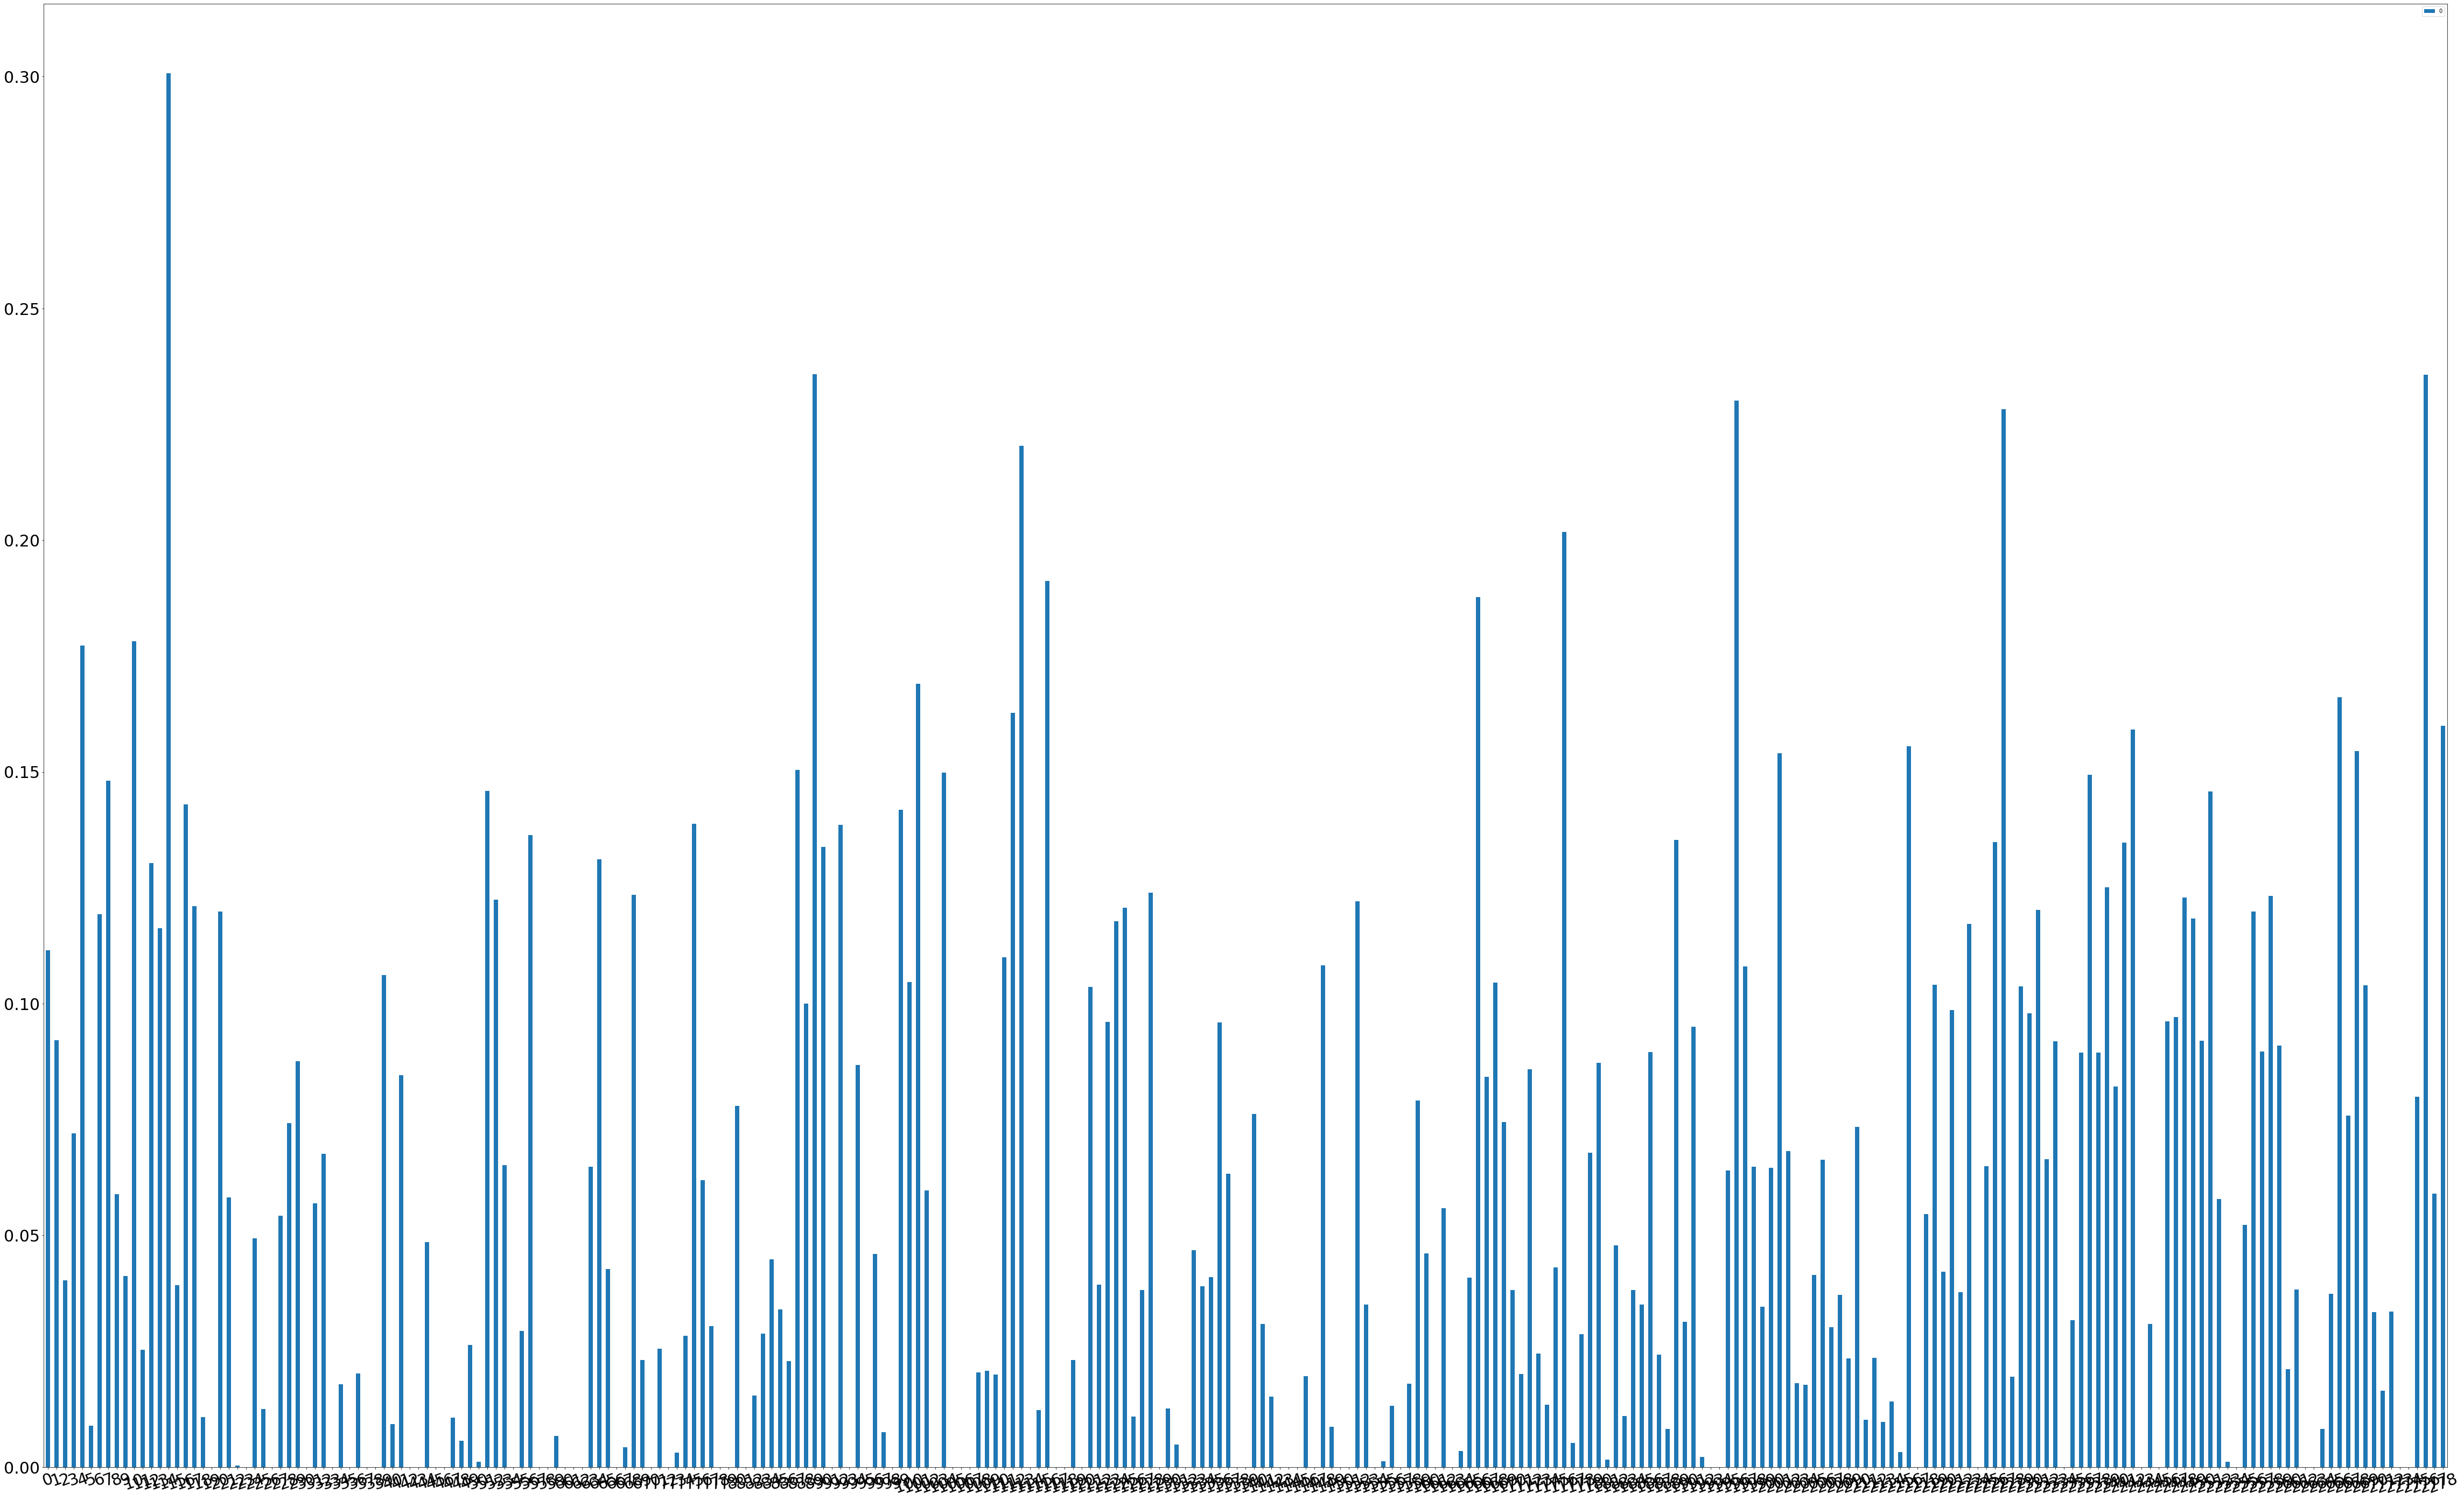

In [937]:
import matplotlib.pyplot as plt



X = np.arange(279)
d = pd.DataFrame(x_sel)


d.plot.bar( rot=20, fontsize=30, figsize=(80,50))

plt.show()

plt.show()

In [938]:
from sklearn.model_selection import KFold
cross_= KFold(n_splits=5, shuffle=True)

In [939]:
#knn with k-flod


In [940]:
accuracy=[]  
precision = []   
recall = []      
f1score = []    
y=data["Class"]
x=X_selected

for i in range(1,31):
    accuracy.append(cross_val_score(KNeighborsClassifier(),x,y,cv=cross_, scoring = make_scorer(accuracy_score)))
    precision.append(cross_val_score(KNeighborsClassifier(),x,y,cv=cross_, scoring = make_scorer(precision_score, average ='micro')))  
    recall.append(cross_val_score(KNeighborsClassifier(),x,y,cv=cross_, scoring = make_scorer(recall_score, average ='micro'))) 
    f1score.append(cross_val_score(KNeighborsClassifier(),x,y,cv=cross_, scoring = make_scorer(f1_score, average ='micro'))) 

In [941]:
x3=np.max(accuracy)
x3

0.6043956043956044

In [942]:
x2=np.min(accuracy)
x2

0.36666666666666664

In [943]:
x1=np.std(accuracy)
x1

0.045876254255640146

In [944]:
x4=np.mean(accuracy)
x4

0.4957289377289376

In [945]:
a4=np.mean(precision )
a4

0.4972153032153032

In [946]:
a3=np.max(precision )
a3

0.5934065934065934

In [947]:
a2=np.min(precision )
a2

0.3888888888888889

In [948]:
a1=np.std(precision )
a1

0.04236779393379711

In [949]:
e2=np.min(recall)
e2

0.36666666666666664

In [950]:
e3=np.max(recall)
e3

0.5934065934065934

In [951]:
e1=np.std(recall)
e1

0.043988466471356624

In [952]:
e4=np.mean(recall)
e4

0.49316483516483517

In [953]:
f3=np.max(f1score)
f3

0.6111111111111112

In [954]:
f2=np.min(f1score)
f2

0.38461538461538464

In [955]:
f1=np.std(f1score)
f1

0.04320135486420645

In [956]:
f4=np.mean(f1score)
f4

0.4915726495726496

In [957]:
accuracy2= []    
precision2 = []   
recall2 = []      
f1score2 = []    

for i in range(1,30):
    accuracy2.append(cross_val_score(SVC(),x,y,cv=cross_, scoring = make_scorer(accuracy_score)))
    precision2.append(cross_val_score(SVC(),x,y,cv=cross_, scoring = make_scorer(precision_score, average ='micro'))) 
    recall2.append(cross_val_score(SVC(),x,y,cv=cross_, scoring = make_scorer(recall_score, average ='micro'))) 
    f1score2.append(cross_val_score(SVC(),x,y,cv=cross_, scoring = make_scorer(f1_score, average ='micro')))

In [958]:
accuracy2

[array([0.57142857, 0.52747253, 0.54444444, 0.51111111, 0.55555556]),
 array([0.50549451, 0.52747253, 0.55555556, 0.52222222, 0.6       ]),
 array([0.54945055, 0.54945055, 0.53333333, 0.56666667, 0.51111111]),
 array([0.54945055, 0.6043956 , 0.6       , 0.5       , 0.45555556]),
 array([0.58241758, 0.51648352, 0.55555556, 0.53333333, 0.52222222]),
 array([0.57142857, 0.61538462, 0.53333333, 0.57777778, 0.41111111]),
 array([0.59340659, 0.58241758, 0.58888889, 0.48888889, 0.45555556]),
 array([0.53846154, 0.49450549, 0.58888889, 0.54444444, 0.54444444]),
 array([0.56043956, 0.56043956, 0.52222222, 0.56666667, 0.5       ]),
 array([0.49450549, 0.53846154, 0.62222222, 0.45555556, 0.6       ]),
 array([0.56043956, 0.54945055, 0.5       , 0.46666667, 0.63333333]),
 array([0.53846154, 0.59340659, 0.48888889, 0.53333333, 0.55555556]),
 array([0.50549451, 0.52747253, 0.62222222, 0.56666667, 0.48888889]),
 array([0.53846154, 0.58241758, 0.52222222, 0.51111111, 0.55555556]),
 array([0.48351648, 

In [959]:
y3=np.max(accuracy2)
y3

0.6703296703296703

In [960]:
y2=np.min(accuracy2)
y2

0.4111111111111111

In [961]:
y4=np.mean(accuracy2)
y4

0.541967917140331

In [962]:
y1=np.std(accuracy2)
y1

0.048564124587498834

In [963]:
b3=np.max(precision2)
b3

0.6777777777777778

In [964]:
b2=np.min(precision2)
b2

0.42857142857142855

In [965]:
b1=np.std(precision2)
b1

0.04866075190546189

In [966]:
b4=np.mean(precision2)
b4

0.5420369668645532

In [967]:
g3=np.max(recall2)
g3

0.6703296703296703

In [968]:
g2=np.min(recall2)
g2

0.42857142857142855

In [969]:
g4=np.mean(recall2)
g4

0.5420597027493579

In [970]:
g1=np.std(recall2)
g1

0.046765310968687676

In [971]:
h3=np.max(f1score2)
h3

0.6813186813186813

In [972]:
h2=np.min(f1score2)
h2

0.4111111111111111

In [973]:
h1=np.std(f1score2)
h1

0.05154739076601712

In [974]:
h4=np.mean(f1score2)
h4

0.5420344406551303

In [975]:
accuracy3= []    
precision3 = []   
recall3 = []      
f1score3 = []    

for i in range(1,31):
    accuracy3.append(cross_val_score(GaussianNB(),x,y,cv=cross_, scoring = make_scorer(accuracy_score)))
    precision3.append(cross_val_score(GaussianNB(),x,y,cv=cross_, scoring = make_scorer(precision_score, average ='micro'))) 
    recall3.append(cross_val_score(GaussianNB(),x,y,cv=cross_, scoring = make_scorer(recall_score, average ='micro'))) 
    f1score3.append(cross_val_score(GaussianNB(),x,y,cv=cross_, scoring = make_scorer(f1_score, average ='micro')))

In [976]:
accuracy3

[array([0.06593407, 0.15384615, 0.12222222, 0.1       , 0.22222222]),
 array([0.14285714, 0.12087912, 0.07777778, 0.2       , 0.16666667]),
 array([0.14285714, 0.1978022 , 0.1       , 0.12222222, 0.13333333]),
 array([0.16483516, 0.18681319, 0.1       , 0.1       , 0.13333333]),
 array([0.12087912, 0.15384615, 0.12222222, 0.13333333, 0.06666667]),
 array([0.16483516, 0.08791209, 0.2       , 0.17777778, 0.13333333]),
 array([0.20879121, 0.12087912, 0.08888889, 0.1       , 0.21111111]),
 array([0.17582418, 0.0989011 , 0.2       , 0.14444444, 0.11111111]),
 array([0.10989011, 0.23076923, 0.16666667, 0.1       , 0.08888889]),
 array([0.0989011 , 0.0989011 , 0.13333333, 0.11111111, 0.22222222]),
 array([0.0989011 , 0.08791209, 0.17777778, 0.12222222, 0.25555556]),
 array([0.14285714, 0.15384615, 0.05555556, 0.07777778, 0.24444444]),
 array([0.18681319, 0.0989011 , 0.11111111, 0.15555556, 0.28888889]),
 array([0.16483516, 0.15384615, 0.14444444, 0.07777778, 0.23333333]),
 array([0.13186813, 

In [977]:
z3=np.max(accuracy3)
z3

0.3

In [978]:
z2=np.min(accuracy3)
z2

0.022222222222222223

In [979]:
z4=np.mean(accuracy3)
z4

0.14040781440781439

In [980]:
z1=np.std(accuracy3)
z1

0.05029456092396385

In [981]:
c3=np.max(precision3)
c3

0.26666666666666666

In [982]:
c2=np.min(precision3)
c2

0.03296703296703297

In [983]:
c4=np.mean(precision3)
c4

0.13487586487586484

In [984]:
c1=np.std(precision3)
c1

0.04921828997088189

In [985]:
i3=np.max(recall3)
i3

0.27472527472527475

In [986]:
i2=np.min(recall3)
i2

0.01098901098901099

In [987]:
i4=np.mean(recall3)
i4

0.13579731379731375

In [988]:
i1=np.std(recall3)
i1

0.047542020646473476

In [989]:
j3=np.max(f1score3 )
j3

0.2777777777777778

In [990]:
j4=np.mean(f1score3 )
j4

0.1355327635327635

In [991]:
j2=np.min(f1score3 )
j2

0.022222222222222223

In [992]:
j1=np.std(f1score3 )
j1

0.047748614702139244

In [993]:
accuracy4= []    
precision4 = []   
recall4 = []      
f1score4 = []    

for i in range(1,30):
    accuracy4.append(cross_val_score(DecisionTreeClassifier(),x,y,cv=cross_, scoring = make_scorer(accuracy_score)))
    precision4.append(cross_val_score(DecisionTreeClassifier(),x,y,cv=cross_, scoring = make_scorer(precision_score, average ='micro'))) 
    recall4.append(cross_val_score(DecisionTreeClassifier(),x,y,cv=cross_, scoring = make_scorer(recall_score, average ='micro'))) 
    f1score4.append(cross_val_score(DecisionTreeClassifier(),x,y,cv=cross_, scoring = make_scorer(f1_score, average ='micro')))

In [994]:
t3=np.max(accuracy4)
t3

0.4222222222222222

In [995]:
t2=np.min(accuracy4)
t2

0.16483516483516483

In [996]:
t4=np.mean(accuracy4)
t4

0.29693486590038315

In [997]:
t1=np.std(accuracy4)
t1

0.0439127583226082

In [998]:
d3=np.max(precision4)
d3

0.38461538461538464

In [999]:
d2=np.min(precision4)
d2

0.2

In [1000]:
d4=np.mean(precision4)
d4

0.29095448612689995

In [1001]:
d1=np.std(precision4)
d1

0.038798610926723084

In [1002]:
k3=np.max(recall4)
k3

0.43333333333333335

In [1003]:
k2=np.min(recall4)
k2

0.1978021978021978

In [1004]:
k4=np.mean(recall4)
k4

0.29569197086438465

In [1005]:
k1=np.std(recall4)
k1

0.041152339050389244

In [1006]:
l3=np.max(f1score4)
l3

0.36666666666666664

In [1007]:
l2=np.min(f1score4)
l2

0.14285714285714285

In [1008]:
l4=np.mean(f1score4)
l4

0.29098816891920337

In [1009]:
l1=np.std(f1score4)
l1

0.042001794035869074

In [1010]:
import pandas as pd
import numpy as np

path = r"D:\tp dami\data_arythmia_classification2_f.xlsx"

dami={'knn':[x1,x2,x3,x4,a1,a2,a3,a4,e1,e2,e3,e4,f1,f2,f3,f4],'svc':[y1,y2,y3,y4,b1,b2,b3,b4,g1,g2,g3,g4,h1,h2,h3,h4],'bayes':[z1,z2,z3,z4,c1,c2,c3,c4,i1,i2,i3,i4,j1,j2,j3,j4],'arebe de decision':[t1,t2,t3,t4,d1,d2,d3,d4,k1,k2,k3,k4,l1,l2,l3,l4]}
df1 = pd.DataFrame(dami,index=['std-accuracy', 'min-accuracy','max-accuracy', 'mean-accuracy','std-precision', 'min-precision','max-precision', 'mean-precision','std-recall', 'min-recall','max-recall', 'mean-recall','std-f1score', 'min-f1score','max-f1score', 'mean-f1score'])

writer = pd.ExcelWriter(path, engine = 'xlsxwriter')
df1.to_excel(writer)

writer.save()
writer.close()